<a href="https://colab.research.google.com/github/Avichai11Greenblum/Data-science-project/blob/main/UFOproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# *Intro*
We are May ( 212271621 ) and Avichai (209455906) computer science students who are about to graduate and are passionate about data science and about exploring the mysteries of the universe.
Together, we will combine our knowledge in data analysis and research to investigate UFO sightings and hopefully uncover new insights.

In this project, we delve into a dataset [sourced from Kaggle](https://www.kaggle.com/datasets/NUFORC/ufo-sightings?select=complete.csv) containing records of UFO sightings reported around the world. Our aim is to analyze this data to uncover patterns, trends, and anomalies that may provide insights into the existence of UFOs and their potential characteristics.



## The problem
Unidentified Flying Objects (UFOs) have long captured the curiosity and imagination of people worldwide, leading to discussions, speculation, and fascination about the possibility of extraterrestrial encounters. While many UFO sightings can be explained by natural phenomena or misinterpretations, there remains a subset of encounters that defy conventional explanation.

In this project, our goal is to train a predictive model to anticipate the occurrence of UFO sightings in different geographical locations. By harnessing the power of data analysis and machine learning techniques, we aim to address several key questions:

* Existence of UFO Patterns: Can we identify consistent patterns or trends within the dataset that suggest the existence of recurrent UFO sightings in specific locations?

* Spatial Distribution: Which country  exhibit the highest frequency of UFO sightings? Are there geographical regions or areas that are more prone to such phenomena?

* Predictive Modeling: Can we develop a reliable predictive model that accurately forecasts the likelihood of UFO sightings occurring in specific locations based on historical data?

Through rigorous analysis of the available dataset and the application of machine learning algorithms, we aim to unravel the mysteries surrounding UFO sightings and contribute to our understanding of these enigmatic phenomena. Join us on this journey as we explore the skies and endeavor to uncover the secrets of unidentified aerial phenomena.


In [ ]:
# this code is for loading everything at once and shall be deleted!! @@
#@
#@
#@

import pandas as pd

pd.set_option('display.max_columns', None)  # Display all columns
pd.set_option('display.max_colwidth', None)

ufo_data = pd.read_csv("/content/sample_data/complete.csv", sep=',', on_bad_lines='skip', low_memory=False, )
ufo_data = ufo_data[ufo_data['country'] == 'us']
cleaned_ufo_data = ufo_data.dropna()
cleaned_ufo_data = cleaned_ufo_data.drop(columns=['date posted', "city", "country", "duration (hours/min)", "latitude", "longitude"])

# Convert the 'datetime' column to datetime format
cleaned_ufo_data['datetime'] = pd.to_datetime(cleaned_ufo_data['datetime'], format='%m/%d/%Y %H:%M', errors='coerce')

# Replace '24:00' with '00:00' and add 1 day to the date
cleaned_ufo_data.loc[cleaned_ufo_data['datetime'].dt.hour == 0, 'datetime'] += pd.Timedelta(days=1)

# Drop rows with null values (we might have new rows with null after parsing datetime)
cleaned_ufo_data = cleaned_ufo_data.dropna()

# Extract the crucial temporal features
cleaned_ufo_data['month'] = cleaned_ufo_data['datetime'].dt.month.astype(int)
cleaned_ufo_data['year'] = cleaned_ufo_data['datetime'].dt.year.astype(int)

# Reorder columns
cleaned_ufo_data = cleaned_ufo_data[['month', 'year'] + [col for col in cleaned_ufo_data.columns if col not in ['month', 'year']]]

# Remove the 'datetime' column
cleaned_ufo_data = cleaned_ufo_data.drop(columns=['datetime'])

<ipython-input-1-2247e8e6cf07>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_ufo_data['month'] = cleaned_ufo_data['datetime'].dt.month.astype(int)
<ipython-input-1-2247e8e6cf07>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_ufo_data['year'] = cleaned_ufo_data['datetime'].dt.year.astype(int)


# Data collection: UFO sightings

The dataset used in this analysis contains reported sightings of unidentified flying objects (UFOs)

In [ ]:
import pandas as pd

pd.set_option('display.max_columns', None)  # Display all columns
pd.set_option('display.max_colwidth', None)

ufo_data = pd.read_csv("/content/sample_data/complete.csv", sep=',', on_bad_lines='skip', low_memory=False, )
ufo_data.head(5)

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
0,10/10/1949 20:30,san marcos,tx,us,cylinder,2700,45 minutes,This event took place in early fall around 1949-50. It occurred after a Boy Scout meeting in the Baptist Church. The Baptist Church sit,4/27/2004,29.8830556,-97.941111
1,10/10/1949 21:00,lackland afb,tx,NaN,light,7200,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing across the sky &amp; making 90 degree turns on a dime.,12/16/2005,29.38421,-98.581082
2,10/10/1955 17:00,chester (uk/england),NaN,gb,circle,20,20 seconds,Green/Orange circular disc over Chester&#44 England,1/21/2008,53.2,-2.916667
3,10/10/1956 21:00,edna,tx,us,circle,20,1/2 hour,My older brother and twin sister were leaving the only Edna theater at about 9 PM&#44...we had our bikes and I took a different route home,1/17/2004,28.9783333,-96.645833
4,10/10/1960 20:00,kaneohe,hi,us,light,900,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/attack aircraft on a solo night exercise&#44 I was at 50&#44000&#39 in a &quot;clean&quot; aircraft (no ordinan,1/22/2004,21.4180556,-157.803611


# Exploring Patterns and Trends in UFO Sightings - Data Analysis

## **UFO sightings by country**

First we shall analyze the distribution of UFO sightings across different countries across the world, The following visualization below presents the distribution of UFO sightings by country:

*   us = United States of America
*   gb = Great Britian
*   de = Germany
*   ca = Canada
*   au = Australia

@

@

@

Remember to run those grapgs in order from the start because now it is affected from later codes in the projects

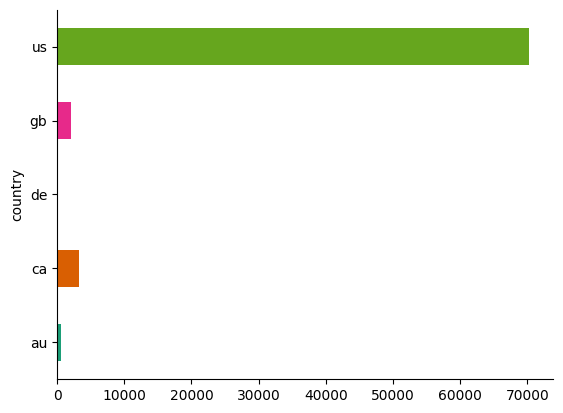

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

ufo_data.groupby('country').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

As can be seen from the chart above, The vast majority of the UFO sightings were in the US, We shall take to account when we will draw conclusions from the data.


## **Number of UFO sightings over the years**

Next we shall see the sightings disterbution over the last 120 years.
The graph visualizes the number of UFO sightings over time based on available
data. Each data point on the graph represents the count of UFO sightings reported for a specific month and year. The x-axis displays the time period in Year-Month format, while the y-axis represents the corresponding number of sightings.

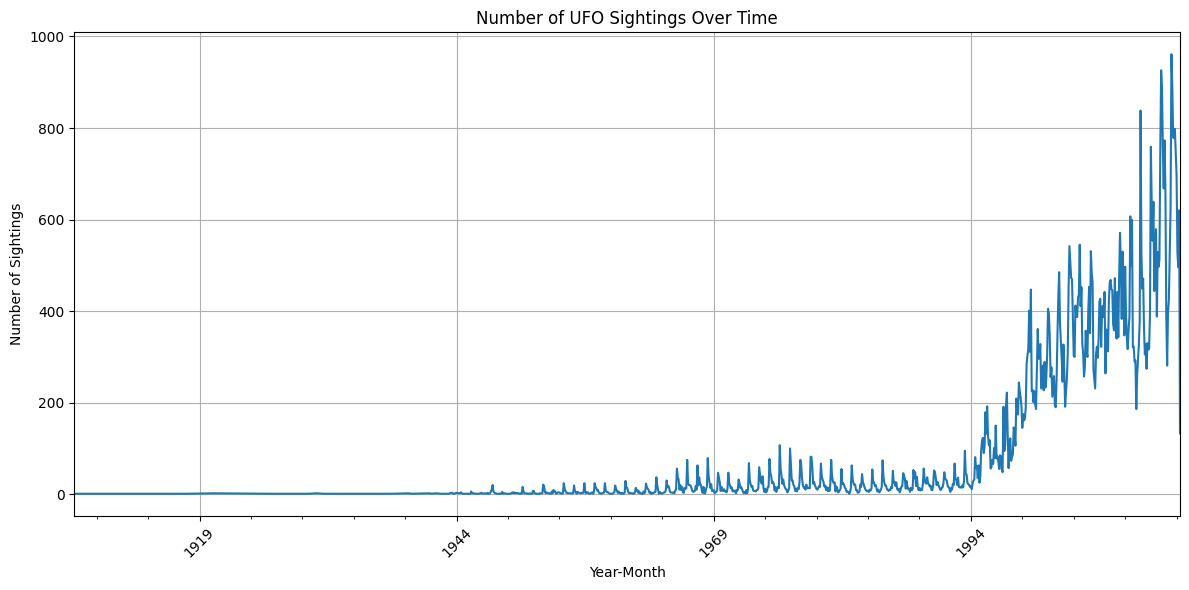

In [ ]:
import matplotlib.pyplot as plt

ufo_data['datetime'] = ufo_data['datetime'].str.replace('24:00', '00:00')
# Convert the 'datetime' column to datetime format
ufo_data['datetime'] = pd.to_datetime(ufo_data['datetime'])

# Group by datetime and count sightings
monthly_counts = ufo_data.groupby(ufo_data['datetime'].dt.to_period('M')).size()

# Plot the number of sightings over time
plt.figure(figsize=(12, 6))
monthly_counts.plot()
plt.title('Number of UFO Sightings Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Number of Sightings')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## **Sightings Throughout Time Intervals**

The following graphs depicts the distribution of UFO sightings across different time intervals.

The first subplot shows sightings throughout the day, revealing any hourly patterns.

The second subplot illustrates sightings throughout the week, indicating variations across different days.

The third subplot presents sightings throughout the month, highlighting monthly fluctuations.

Lastly, the fourth subplot displays sightings throughout the years covered by the dataset, revealing long-term trends.

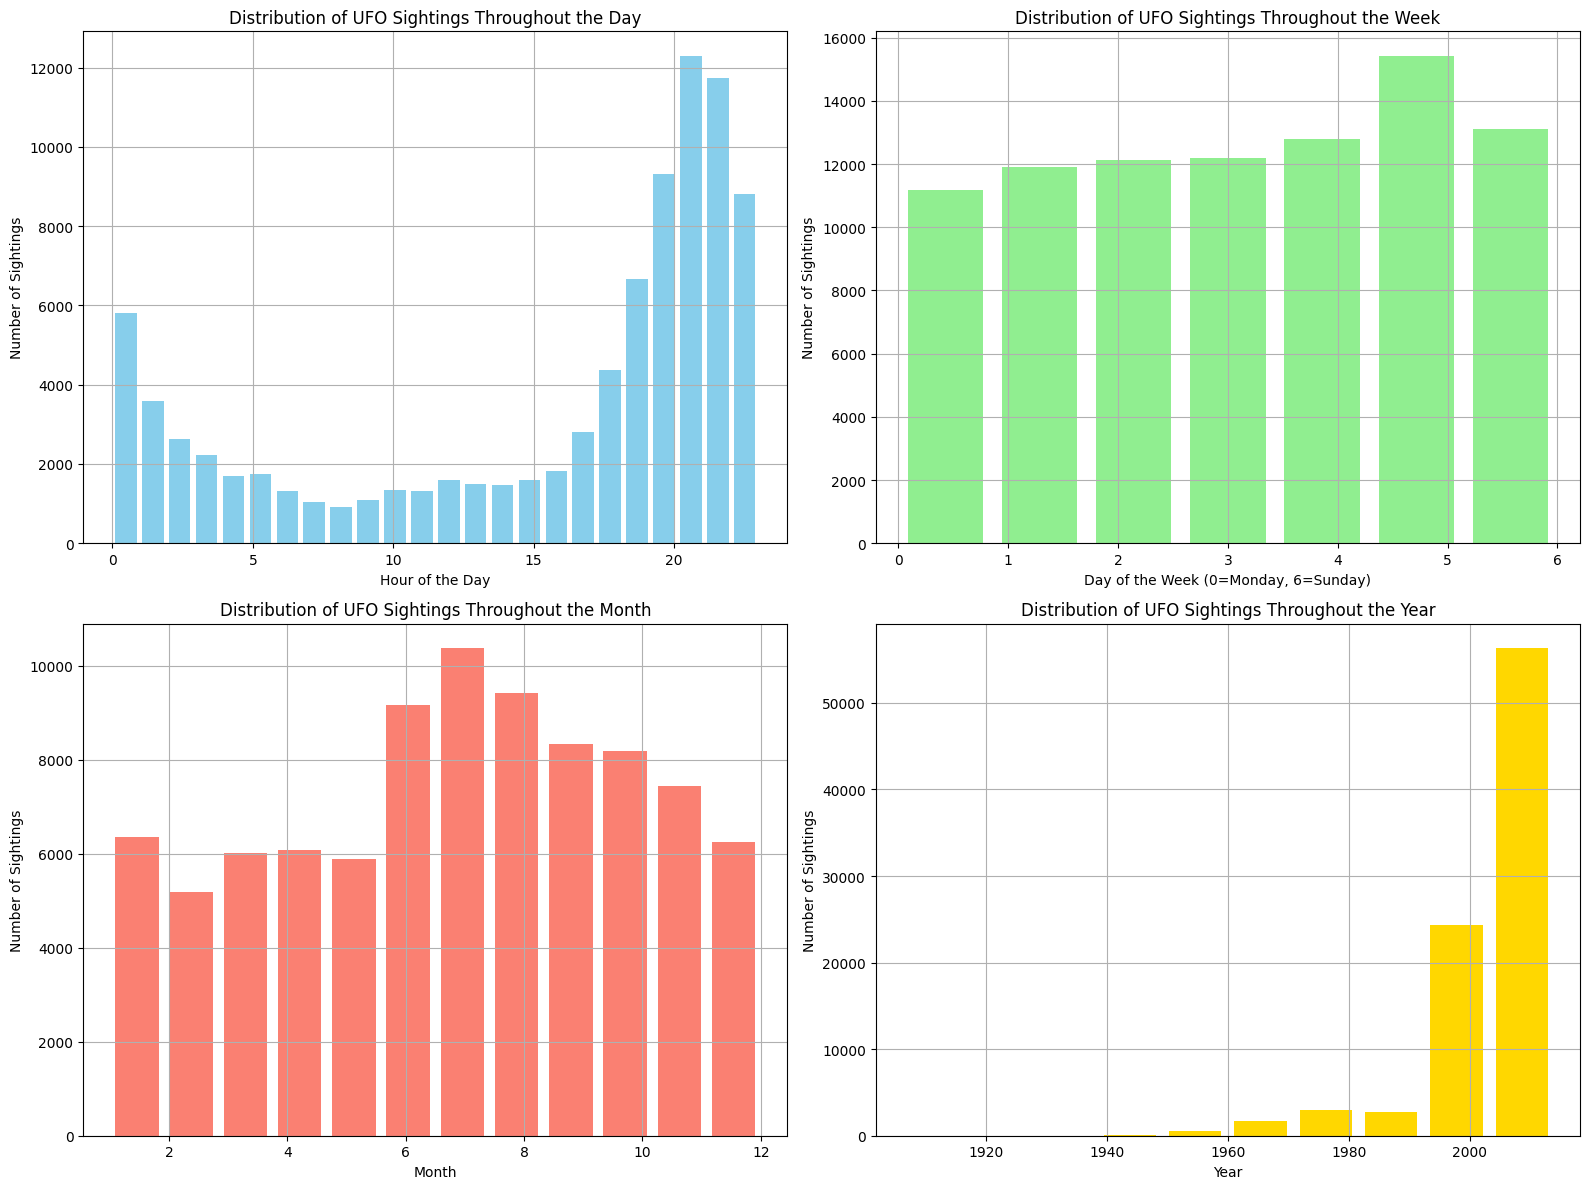

In [ ]:
# Convert the 'datetime' column to datetime format
ufo_data['datetime'] = pd.to_datetime(ufo_data['datetime'], format='%m/%d/%y %H:%M')

# Create separate plots for distribution throughout the day, week, month, and year
plt.figure(figsize=(16, 12))

# Distribution throughout the day
plt.subplot(2, 2, 1)
ufo_data['datetime'].dt.hour.hist(bins=24, rwidth=0.8, color='skyblue')
plt.title('Distribution of UFO Sightings Throughout the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Sightings')

# Distribution throughout the week
plt.subplot(2, 2, 2)
ufo_data['datetime'].dt.dayofweek.hist(bins=7, rwidth=0.8, color='lightgreen')
plt.title('Distribution of UFO Sightings Throughout the Week')
plt.xlabel('Day of the Week (0=Monday, 6=Sunday)')
plt.ylabel('Number of Sightings')

# Distribution throughout the month
plt.subplot(2, 2, 3)
ufo_data['datetime'].dt.month.hist(bins=12, rwidth=0.8, color='salmon')
plt.title('Distribution of UFO Sightings Throughout the Month')
plt.xlabel('Month')
plt.ylabel('Number of Sightings')

# Distribution throughout the year
plt.subplot(2, 2, 4)
ufo_data['datetime'].dt.year.hist(rwidth=0.8, color='gold')
plt.title('Distribution of UFO Sightings Throughout the Year')
plt.xlabel('Year')
plt.ylabel('Number of Sightings')

plt.tight_layout()
plt.show()

As can be seen in the above charts, Most of the UFO sights were observed throughout the night hours.
Regarding the of the week or the month it appears to be somewhat evenly distributed.


## **Distribution of UFO Sightings by State in the US**

The following bar chart depicts the distribution of UFO sightings by state. Each bar represents a state, and the height of the bar indicates the number of sightings reported in that state. The x-axis displays the states, while the y-axis represents the corresponding number of sightings. By focusing on the top 10 states with the highest number of sightings, this visualization offers insights into geographic areas where UFO sightings are most frequently reported.

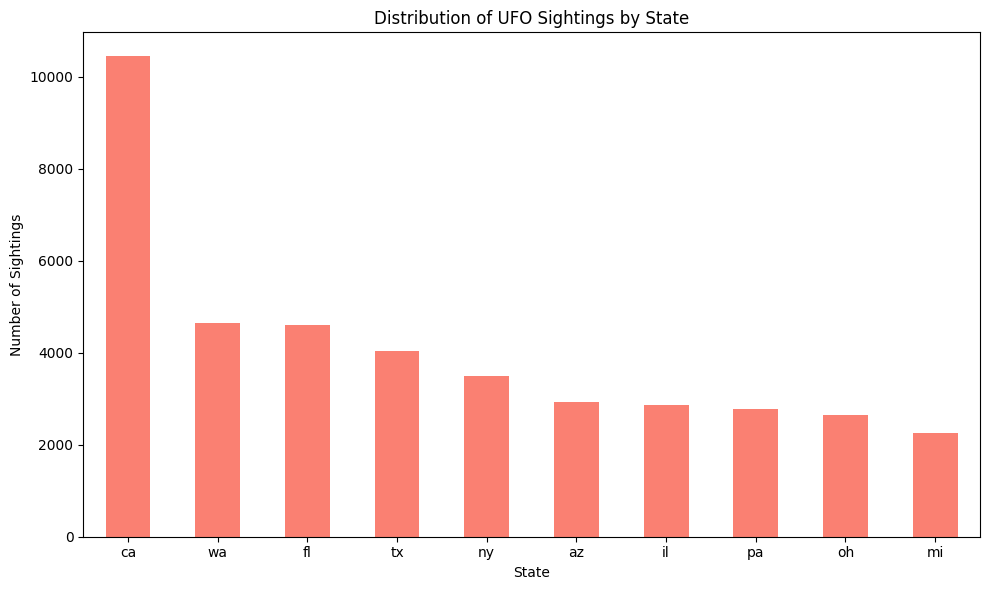

In [ ]:
# Distribution by state
state_counts = ufo_data['state'].value_counts().head(10)  # Top 10 states for better visualization
plt.figure(figsize=(10, 6))
state_counts.plot(kind='bar', color='salmon')
plt.title('Distribution of UFO Sightings by State')
plt.xlabel('State')
plt.ylabel('Number of Sightings')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

The states that are being shown in the chart are:
*   ca - California
*   wa - Washington
*   fl - Florida
*   tx - Texas
*   ny - New York
*   az - Arizona
*   il -Illinois
*   pa - Pennsylvania
*   oh - Ohio
*   mi - Michigan


## **Distribution of UFO Sightings by City:**

The following pie chart showcases the distribution of UFO sightings by city. Each slice of the pie represents a city (US) , and the size of the slice corresponds to the proportion of sightings reported in that city relative to the total. The chart is limited to the top 10 cities with the highest number of sightings for better visualization. By presenting the distribution in a pie chart format, this visualization allows for a quick understanding of the relative contribution of each city to the total number of sightings.

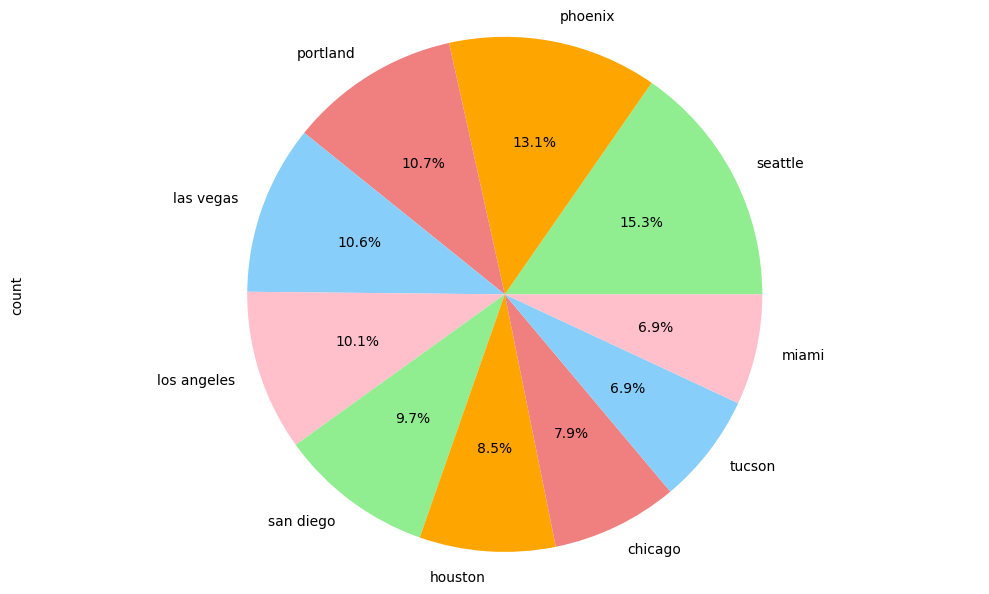

In [ ]:
# Distribution by city
city_counts = ufo_data['city'].value_counts().head(10)  # Top 10 cities for better visualization
plt.figure(figsize=(10, 6))
city_counts.plot(kind='pie', autopct='%1.1f%%', colors=['lightgreen', 'orange', 'lightcoral', 'lightskyblue', 'pink'])
plt.axis('equal')
plt.tight_layout()
plt.show()

## **Distribution of UFO Shapes Reported**

The following bar chart displays the distribution of different UFO shapes reported in the dataset. Each bar represents a specific shape of UFO, and the height of the bar indicates the number of sightings reported for that shape. The x-axis shows the various UFO shapes, while the y-axis represents the corresponding number of sightings. By visualizing the distribution of UFO shapes, this plot provides insights into the most commonly reported shapes of UFOs. It helps in understanding the prevalence of different UFO shapes among the reported sightings.

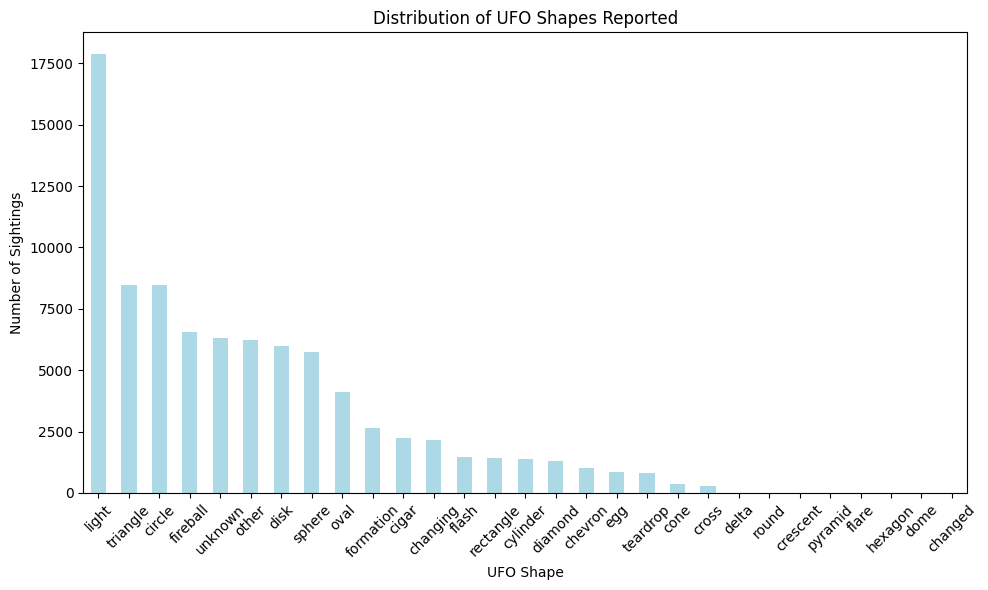

In [ ]:
# Plot the distribution of different UFO shapes reported
plt.figure(figsize=(10, 6))
ufo_data['shape'].value_counts().plot(kind='bar', color='lightblue')
plt.title('Distribution of UFO Shapes Reported')
plt.xlabel('UFO Shape')
plt.ylabel('Number of Sightings')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## **Frequency of UFO Sightings by Duration Categories**

This bar chart explores the frequency of UFO sightings based on duration categories. The dataset is categorized into different duration categories, such as short, medium, and long, based on predefined duration thresholds. The x-axis represents the duration categories, while the y-axis indicates the corresponding number of sightings. By visualizing the frequency of sightings in each duration category, this plot provides insights into the distribution of UFO sightings based on their reported durations. It helps in understanding the prevalence of sightings across different duration ranges, allowing for further analysis of UFO sighting patterns. Adjustments to the duration thresholds can be made to tailor the analysis to specific criteria or preferences.

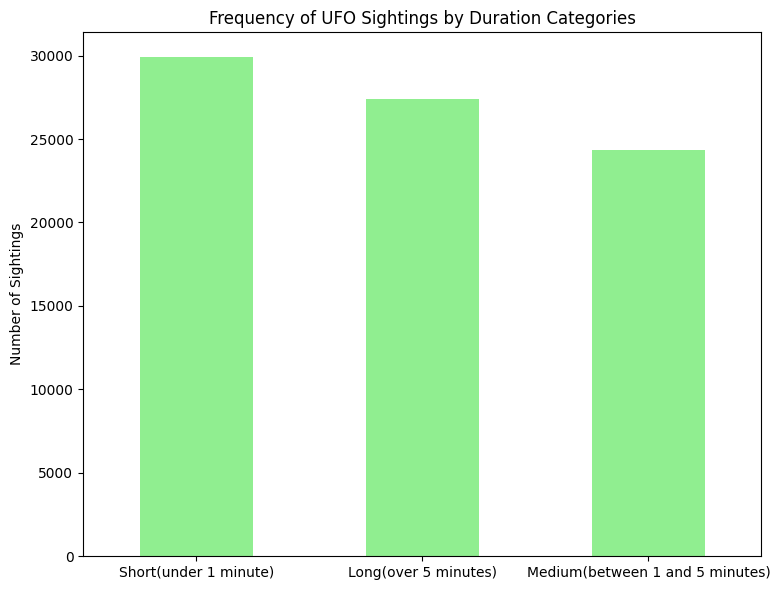

In [ ]:
# Convert 'duration_seconds' to numeric
ufo_data['duration (seconds)'] = pd.to_numeric(ufo_data['duration (seconds)'], errors='coerce')

# Define duration categories
short_duration = 60
medium_duration = 300

# Create duration categories based on defined thresholds
ufo_data['duration_category'] = pd.cut(ufo_data['duration (seconds)'],
                                       bins=[0, short_duration, medium_duration, float('inf')],
                                       labels=['Short(under 1 minute)', 'Medium(between 1 and 5 minutes)', 'Long(over 5 minutes)'])

# Plot the frequency of sightings based on duration categories
plt.figure(figsize=(8, 6))
ufo_data['duration_category'].value_counts().plot(kind='bar', color='lightgreen')
plt.title('Frequency of UFO Sightings by Duration Categories')
plt.ylabel('Number of Sightings')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

## **Correlation Between Reported Duration and Location**

This heatmap visualizes the correlation between reported duration and location variables such as latitude and longitude. Each cell in the heatmap represents the correlation coefficient between two variables, with values ranging from -1 to 1. A value closer to 1 indicates a strong positive correlation, while a value closer to -1 indicates a strong negative correlation. The diagonal cells represent the correlation of each variable with itself, which is always 1. By examining the heatmap, we can identify whether there's any significant correlation between the reported duration and the location variables.

At the moment we cannot run the script for that due to the problem that we have null values and we need to clean the data set first.


In [ ]:
# Convert columns to numeric, coerce errors to NaN
ufo_data['duration (seconds)'] = pd.to_numeric(ufo_data['duration (seconds)'], errors='coerce')

# Drop rows with NaN values in the selected columns
ufo_data = ufo_data.dropna(subset=['duration (seconds)'])

# Convert latitude and longitude columns to numeric, coerce errors to NaN
ufo_data['latitude'] = pd.to_numeric(ufo_data['latitude'], errors='coerce')
ufo_data['longitude'] = pd.to_numeric(ufo_data['longitude'], errors='coerce')


Now that the data is clean we can show the heatmap of the requeired columns.

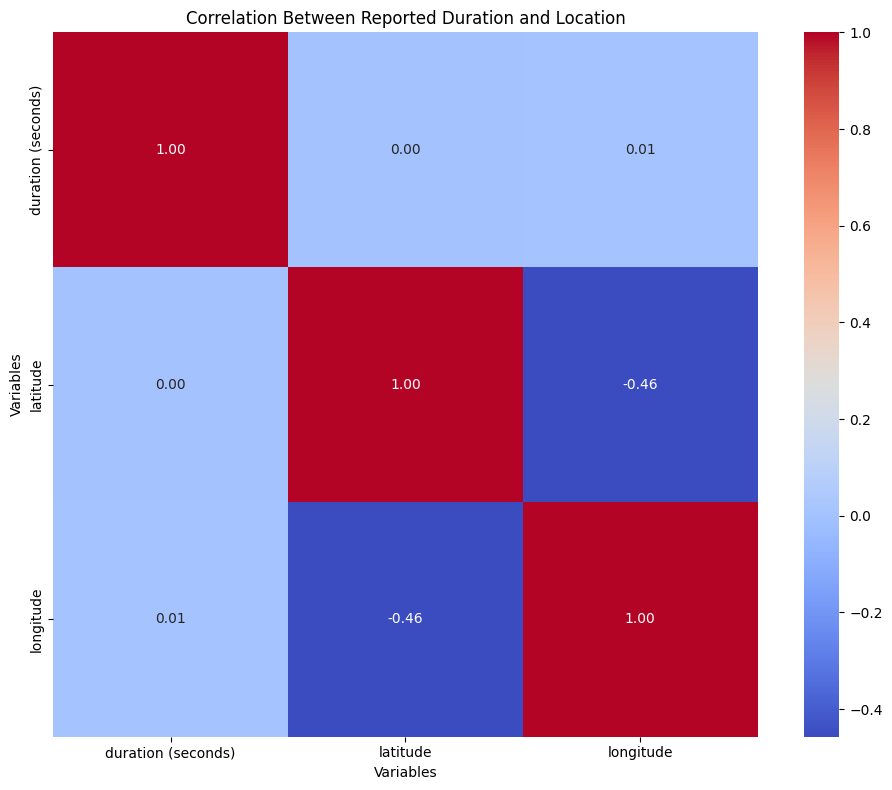

In [ ]:
# Select relevant columns for correlation analysis
selected_columns = ['duration (seconds)', 'latitude', 'longitude']

# Calculate the correlation matrix
correlation_matrix = ufo_data[selected_columns].corr()

# Plot the heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Between Reported Duration and Location')
plt.xlabel('Variables')
plt.ylabel('Variables')
plt.tight_layout()
plt.show()

As we can see form the heatmap shwon above there is not much of correlationbetween the longitude\latitude and the duration of the UFO sight record.

## **Word Cloud of UFO Sightings Comments**

This word cloud visualization displays common themes or keywords found in the 'comments' column of the UFO sightings dataset. By examining the word cloud, we can identify recurring themes or keywords mentioned in the comments, providing insights into the reported sightings. This visualization aids in understanding the most frequently mentioned aspects or descriptions of UFO sightings reported in the dataset.

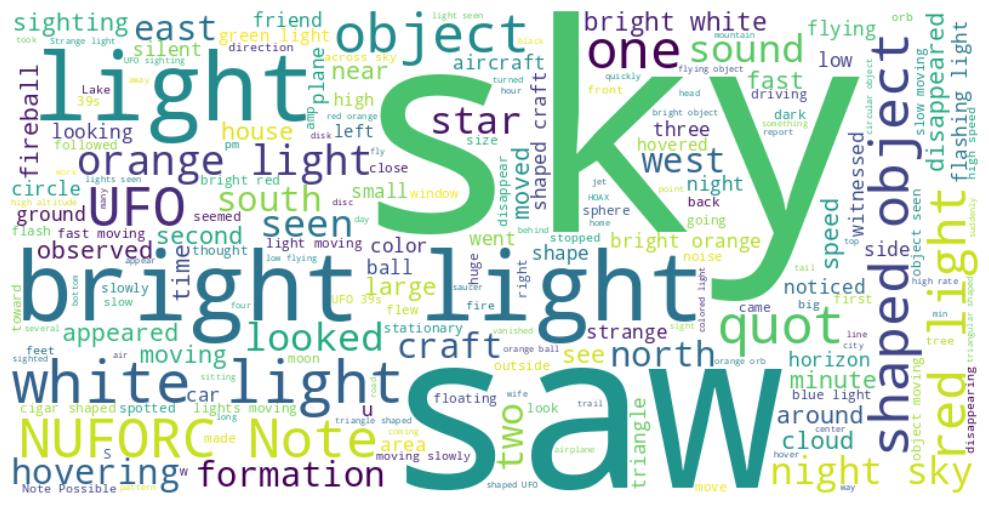

In [ ]:
from wordcloud import WordCloud

# Concatenate all comments into a single string
all_comments = ' '.join(ufo_data['comments'].dropna())

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_comments)

# Plot word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout()
plt.show()

# conclusions from analysis on raw data

Let us now go over the conclusins from the first round of analysis of the data:

*   The vast majority of UFO sigthings occurred in the US  

*   UFO sightings becamee much more abundant after 1994

*   The timing of UFO sightings usually happen during the night time with no big difference in day of the week and a bit more around Jun to Aug - meaning when its summer time people report more often about UFO sightings.

*   The state with more than double UFO sightings compared to any other states is California

*   There is not one city in the US where almost all of the UFO sightings were observed but 10 major cities where the distribution of sights is in the range of 6.9% - 15.3% and a remaining of 0.3% for other places acrros the US, Meaning we have an indication that almost all of the UFO sightings happen around big cities with a lot of people.

*   The most common shape by fat that describes the UFO is light followed by triangle and circle and somethimes few categories combined

*   The distribution of the length of the UFO sightings is pretty equal between shrot, medium and long

*   There isnt much correlation between the geographical coordinates to the duration of the UFO sightings


Now after that we have drew first conclusions from the data analysis we can now move on to the next part which is cleaning and modifying the data to so we can use the data set in a better way to predict the next UFO sight will happen.



# Preparing the data set for model building



## Cleaning the data from unnecessary rows and columns



### Isolating records of sights from the US
Following the conclusions from the previous section we will prepare the data in the data set to best fit a prediction model,
Let us begin with cleaning the data set from every record that does not belong to the US (We found that more than 92% of the sightings are from there and the rest 8% is pretty scattered among other countries).

In [ ]:
# Filter the DataFrame to keep only records where the country is "US"
ufo_data = ufo_data[ufo_data['country'] == 'us']

Now that we have filtered countries that are not US, The cuntry distribution is only focusing on the US and has the following size:

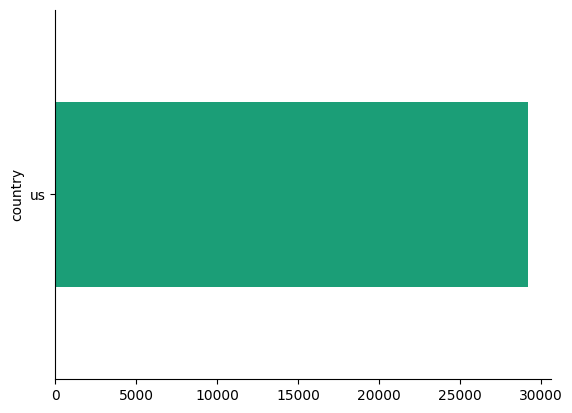

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

ufo_data.groupby('country').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

### Removing null and empty values from the data set

Next we shall remove all the records that have a null or empty value so they wont interfere to the predictions of the models.

In [ ]:
# Drop rows with any missing values
cleaned_ufo_data = ufo_data.dropna()

### Removing unnecessary columns

Next we shall get rid of the "date posted" column because the date that the UFO sighting was posted does not help us to predict the next possible sight (for that we have the actual sight's date).

In [ ]:
# Remove the "date posted" column from the DataFrame
cleaned_ufo_data = cleaned_ufo_data.drop(columns=['date posted', "city", "country", "duration (hours/min)", "latitude", "longitude"])

Now after we have finished cleaning our data set from irrelevant data let us see a sample of the current data set.

In [ ]:
# Display the first 10 rows of the cleaned dataset
cleaned_ufo_data.head(10)

,datetime,state,shape,duration (seconds),comments
0,10/10/1949 20:30,tx,cylinder,2700,This event took place in early fall around 1949-50. It occurred after a Boy Scout meeting in the Baptist Church. The Baptist Church sit
3,10/10/1956 21:00,tx,circle,20,My older brother and twin sister were leaving the only Edna theater at about 9 PM&#44...we had our bikes and I took a different route home
4,10/10/1960 20:00,hi,light,900,AS a Marine 1st Lt. flying an FJ4B fighter/attack aircraft on a solo night exercise&#44 I was at 50&#44000&#39 in a &quot;clean&quot; aircraft (no ordinan
5,10/10/1961 19:00,tn,sphere,300,My father is now 89 my brother 52 the girl with us now 51 myself 49 and the other fellow which worked with my father if he&#39s still livi
7,10/10/1965 23:45,ct,disk,1200,A bright orange color changing to reddish color disk/saucer was observed hovering above power transmission lines.
8,10/10/1966 20:00,al,disk,180,Strobe Lighted disk shape object observed close&#44 at low speeds&#44 and low altitude in Oct 1966 in Pell City Alabama
9,10/10/1966 21:00,fl,disk,120,Saucer zaps energy from powerline as my pregnant mother receives mental signals not to pass info
10,10/10/1968 13:00,ca,circle,300,ROUND &#44 ORANGE &#44 WITH WHAT I WOULD SAY WAS POLISHED METAL OF SOME KIND AROUND THE EDGES .
11,10/10/1968 19:00,nc,fireball,180,silent red /orange mass of energy floated by three of us in western North Carolina in the 60s
12,10/10/1970 16:00,ny,disk,1800,silver disc seen by family and neighbors


## Parsing the data in the data set

In the previuos section we cleaned the data from irrelevant records and now we can start to parse the different columns into a better format for the models to be trained upon


### Spliting the datetime column to it's components

First we sahll split the datetime values into years, months, days and hours:

In [ ]:
import pandas as pd

# Convert the 'datetime' column to datetime format
cleaned_ufo_data['datetime'] = pd.to_datetime(cleaned_ufo_data['datetime'], format='%m/%d/%Y %H:%M', errors='coerce')

# Replace '24:00' with '00:00' and add 1 day to the date
cleaned_ufo_data.loc[cleaned_ufo_data['datetime'].dt.hour == 0, 'datetime'] += pd.Timedelta(days=1)

# Drop rows with null values (we might have new rows with null after parsing datetime)
cleaned_ufo_data = cleaned_ufo_data.dropna()

# Extract the crucial temporal features
cleaned_ufo_data['month'] = cleaned_ufo_data['datetime'].dt.month.astype(int)
cleaned_ufo_data['year'] = cleaned_ufo_data['datetime'].dt.year.astype(int)

# Reorder columns
cleaned_ufo_data = cleaned_ufo_data[['month', 'year'] + [col for col in cleaned_ufo_data.columns if col not in ['month', 'year']]]

# Remove the 'datetime' column
cleaned_ufo_data = cleaned_ufo_data.drop(columns=['datetime'])


After parsing the datetime column our data set looks as follows:

In [ ]:
cleaned_ufo_data.head(5)

,month,year,state,shape,duration (seconds),comments
0,10,1949,tx,cylinder,2700,This event took place in early fall around 1949-50. It occurred after a Boy Scout meeting in the Baptist Church. The Baptist Church sit
3,10,1956,tx,circle,20,My older brother and twin sister were leaving the only Edna theater at about 9 PM&#44...we had our bikes and I took a different route home
4,10,1960,hi,light,900,AS a Marine 1st Lt. flying an FJ4B fighter/attack aircraft on a solo night exercise&#44 I was at 50&#44000&#39 in a &quot;clean&quot; aircraft (no ordinan
5,10,1961,tn,sphere,300,My father is now 89 my brother 52 the girl with us now 51 myself 49 and the other fellow which worked with my father if he&#39s still livi
7,10,1965,ct,disk,1200,A bright orange color changing to reddish color disk/saucer was observed hovering above power transmission lines.


# Random forest model  



## Spliting the data into training and testing sets

Now that our data is ready and parsed we can start to split it between training sets and testing sets for the differnt models and then choose a model to train and test the data,

The first model we will use is random forest model, Random Forest is an ensemble learning technique used in machine learning for classification and regression tasks that uses multiple decision trees during training, each using a subset of the training data and a random selection of features. This randomness helps to reduce overfitting and improve generalization.

The following spilt aims to split the data so the models will be able to predict which characteristics can forshadow for future UFO sightings


Let us begin with giving the model all the numeric values columns in order to try and predict the state value:
*   month
*   year
*   duration (seconds)

As we can see, We have 52714 rows for the train set and 13179 rows for the test set, Meaning we have 20% of the data serving as test and 80% as training data

In [ ]:
from sklearn.model_selection import train_test_split

# x is the training we feed the model and y is the required forshadowed output
X = cleaned_ufo_data[[ 'month', 'year', 'duration (seconds)' ]]
y = cleaned_ufo_data['state']

# Split the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the resulting datasets
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (52714, 3) (52714,)
Testing set shape: (13179, 3) (13179,)


## Using and modifing the model in order to improve resutls  
Now that we have the model trained we can create a random forest calssifiaer and see how the model is behaving


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Instantiate the Random Forest classifier and train the model
rf_model = RandomForestClassifier(random_state=42)

rf_model.fit(X_train, y_train)

# Make predictions and test the model
y_pred = rf_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.08035511040291372


As we can see from our our result, The model could not predict in a good way which state would have future UFO sightings (8%), Let us try and modify the training method and train the model on 90% of the data instead of 80%

In [ ]:
X = cleaned_ufo_data[[ 'month', 'year', 'duration (seconds)' ]]
y = cleaned_ufo_data['state']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.0834597875569044


As we can see the extra 10% of data as training set did not help the model to improve the way we expected (+0.3%).

 Let us try and get rid of the duration column and see if it might do more damge than good

In [ ]:
X = cleaned_ufo_data[[ 'month', 'year' ]]
y = cleaned_ufo_data['state']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.12807283763277694


When dropping the duration column our model improves it's accuracy by more than 50% (!)

Meaning the duration column is in the way for better results, Let us try now to include the non numeric values to the date, Meaning to include the cloumn shape in our training data, In order to do that we will encode the strings with label encoder


In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

encoded_ufo_data = cleaned_ufo_data.copy()

# Encode the 'shape' column using LabelEncoder
label_encoder = LabelEncoder()
encoded_ufo_data['shape'] = label_encoder.fit_transform(encoded_ufo_data['shape'])

X = encoded_ufo_data[['month', 'year', 'shape']]
y = encoded_ufo_data['state']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.09499241274658574


From the result of the model with the 'shape' column we can see that when we try to add the shape to the model the accuracy is going down


## Conclusion for random forest

**The optimal result we can achive using the random forest model is 12.8% accuracy when we train the model on 90% of the data and without using the duration and without encoding the shape column.**

# Support Vector Machines (svm) model



After experimenting with the random forest model we will now try a different model in order to search for better performance and better accuracy.

We will now move on to try and use the support vector machines model (from now on will be referred as svm).

The svm's model main objective is to find the optimal hyperplane that best separates different classes in the input space, making it particularly effective for binary classification problems. SVM works by mapping input data into a high-dimensional feature space and identifying the hyperplane that maximizes the margin, or distance, between the nearest data points of different classes.

##Spliting the data into training and testing sets
Let us begin with all the numeric values as before with the duration column and then we will try without it and compare the performance of the two runs.

In [ ]:
from sklearn.model_selection import train_test_split

X = cleaned_ufo_data[[ 'year', 'month', 'duration (seconds)']]
y = cleaned_ufo_data['state']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (59303, 3) (59303,)
Testing set shape: (6590, 3) (6590,)


##Using and modifing the model in order to improve resutls

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Instantiate the Support Vector Classifier and train the model
svm_model = SVC()
svm_model.fit(X_train, y_train)

y_pred_svm = svm_model.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("Accuracy of SVM:", accuracy_svm)

Accuracy of SVM: 0.12974203338391502


In the code above we trained the model with the duration column, We saw in the random forest model that it might cause more harm than good, Because of it we shall run the model without the duration values to see if it might improve the model's performance.

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

X = cleaned_ufo_data[[ 'year', 'month' ]]
y = cleaned_ufo_data['state']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

svm_model = SVC()
svm_model.fit(X_train, y_train)

y_pred_svm = svm_model.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("Accuracy of SVM:", accuracy_svm)

Accuracy of SVM: 0.12974203338391502


As we can see from the results above, The model doesnt have better results when the duration column is not part of the data set and both runs have the same accuracy score of 12.974%,

The onlu differnce was that the runtime of the model without the duration column was slightly faster so henceforth we will not use the duration column in the next runs of the SVM model.

Like random forest before, We can now check and compare the reults of the model when we incorporate the shape column values and conclude if it helps the model to achive better results

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

encoded_ufo_data = cleaned_ufo_data.copy()
label_encoder = LabelEncoder()
encoded_ufo_data['shape'] = label_encoder.fit_transform(encoded_ufo_data['shape'])

X = encoded_ufo_data[[ 'year', 'month', 'shape' ]]
y = encoded_ufo_data['state']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

svm_model = SVC()
svm_model.fit(X_train, y_train)

y_pred_svm = svm_model.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("Accuracy of SVM:", accuracy_svm)

Accuracy of SVM: 0.12974203338391502


As we can see from the result above, The accuracy score of the SVM model with the addition of encoded shape values is still 12.974% meaning the shape column does not contribute to the performance of the model.

## conclusion for SVM model

**The optimal result we can achive using the SVM model is 12.974% in accuracy when we train the model on 90% of the data and we also found out that the duration and shape columns are not making any change of they are part wether the model or not.**

# Neural networks


So far we have seen 2 different models with quite similar results in accuracy, We will now move on the the third model which is the one we assume that will have the highest accuracy due to it being more fitting to predicting the UFO sightings in the future.

The third model will be deep neural networks which are computational models inspired by the structure and function of biological neural networks, such as the human brain. They consist of interconnected layers of nodes, called neurons, organized in a hierarchical fashion. Each neuron receives input signals, performs a computation on them using an activation function, and then passes the result to the neurons in the next layer. Through a process called training, neural networks learn to adjust the connections between neurons to map input data to desired output.

## Trying to use SKlearn library   
Let us go though the stages and checks we did with the 2 previous models and check if duration and shape column are helping the model or not.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

encoded_ufo_data = cleaned_ufo_data.copy()

X = encoded_ufo_data[['month', 'year']]
y = encoded_ufo_data['state']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Define the neural network model and train it
nn_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000)
nn_model.fit(X_train, y_train)

y_pred = nn_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of neural netwrok:", accuracy)


Accuracy of neural netwrok: 0.12974203338391502


Next we shall add the duration column to the training set and see the difference


In [ ]:
X = encoded_ufo_data[['month', 'year', 'duration (seconds)']]
y = encoded_ufo_data['state']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
nn_model.fit(X_train, y_train)

y_pred = nn_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of neural netwrok:", accuracy)


Accuracy of neural netwrok: 0.12974203338391502


As can be seen from the last run the results of the model got the same accuracy of 12.974% like the highest performance of the 2 previous models, Meaning the duration column isnt helpful in this model either.

And for the last repeating check from the previous models we will add the shape column values using the label encoder.

In [ ]:
from sklearn.preprocessing import LabelEncoder

encoded_ufo_data = cleaned_ufo_data.copy()

label_encoder = LabelEncoder()
encoded_ufo_data['shape'] = label_encoder.fit_transform(encoded_ufo_data['shape'])

X = encoded_ufo_data[['month', 'year', 'shape']]
y = encoded_ufo_data['state']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
nn_model.fit(X_train, y_train)

y_pred = nn_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of neural netwrok:", accuracy)


Accuracy of neural netwrok: 0.12974203338391502


As can be seen the score of the model with the shape column stays the same and is 12.974% meaning that only the year and month values are the contributers of the model in neural network as well.

## Tring to normalize the data's values

After seeing that the year and the month are the main contributers for the model we will now try to make the data in smaller ranges (aka normalizing the data) in attempt to make the model more accurate.

The reason it is better to the model is that models usually prefer values as close to the range of (0, 1) and we can achieve that by using the MinMaxScaler function from SKlearn library.

In [ ]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

#          month,     year
ranges = [(1, 12), (1900, 2050)]

# encoded_ufo_data["duration (seconds)"] = pd.to_numeric(encoded_ufo_data["duration (seconds)"])

encoded_ufo_data = cleaned_ufo_data.copy()
numeric_data = encoded_ufo_data.select_dtypes(include=[np.number])

# Normalize the data
scalers = [MinMaxScaler(feature_range=(r[0], r[1])) for r in ranges]

# Reshape the data for scaler
scaled_data = []
for i, (scaler, col) in enumerate(zip(scalers, numeric_data.columns)):
  # Reshape to 2D array
  scaled_column = scaler.fit_transform(numeric_data[col].values.reshape(-1, 1))
  scaled_data.append(scaled_column)

# Combine scaled data into a DataFrame
scaled_data = np.concatenate(scaled_data, axis=1)
scaled_df = pd.DataFrame(scaled_data, columns=numeric_data.columns)

# Add the 'state' column from the original data (without scaling)
scaled_df['state'] = encoded_ufo_data['state']
scaled_df = scaled_df.dropna()

Now after we have normalized the values of the data we can train the model again and see if there are any improvments.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

X = scaled_df[['month', 'year']]
y = scaled_df['state']

nn_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
nn_model.fit(X_train, y_train)

y_pred = nn_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of neural netwrok:", accuracy)


Accuracy of neural netwrok: 0.1438510333537958


interestingly when we normalize the data we get a slightly better performance for the model, from 12.974% to 14.385%

**conclusion for neural networks with SKlearn: The optimal result we can achive using the SKlearn library is 14.385% in accuracy when we train the model on 90% of the data and we also found out that the duration and shape columns are not making any change wether they are part of the model or not.**

## Trying to use Pytorch library

After using the SKlearn library we will now try to see if we can further improve the model's accuracy by implementing a custom made neural networl using Meta's pytorch library that is considered to be more popular among the internet.

### implementing a way to represent the data

Lets first define a system for encoding and decoding data representations for the neural network, For that we will use the hot vector method.

Also, We will use dicts for indexing the month and states values in with the hot vector method so the model wont be confused by the proximity of numbers to proximity between values, For example if a UFO sight happend in state of index 3, It does not mean that the value is closer to the state indexed 4 compared to the state indexed 11 etc.

In [ ]:
import numpy as np

month_dict = {month: index for month, index in zip(range(1,13), range(12))}
state_dict = {state: index for index, state in enumerate(list(set(cleaned_ufo_data["state"].to_list())))}

def one_hot_vector(size: int, index: int):
    vector = np.zeros(size, dtype=np.float32)
    vector[index] = 1
    return vector

def reverse_dict(dict):
    return {value: key for key,value in dict.items()}

class DataRepresentation:
    def __init__(self, encodings = [month_dict, (1950, 2024)]):
        """
            encodings - represents inputs, if dict - discrete, if tuple - range
        """
        self.encodings = encodings
        self.reverse_dicts = [reverse_dict(encoding) if isinstance(encoding, dict) else None for encoding in encodings]

    def encode(self, x):
        """
            this function takes pandas representation of a sample and return the input for the NN
        """
        assert len(x) == len(self.encodings)
        encoding = []
        for i in range(len(self.encodings)):
            # check if the encoding descrete
            if isinstance(self.encodings[i], tuple):
                # the encoding is a range
                min_value, max_values = self.encodings[i]
                value_to_encode = x[i]
                en = (value_to_encode - min_value) / max_values
                en = np.array([en], dtype=np.float32)
                encoding.append(en)
            elif isinstance(self.encodings[i], dict):
                # the encoding is descrete
                mapper = self.encodings[i]
                descrete_value = mapper[x[i]]
                en = one_hot_vector(len(self.encodings[i]), descrete_value)
                encoding.append(en)
            else:
                raise ValueError("The encodings must be ranges or dicts")

        encoding = np.concatenate(encoding, axis=0)
        return encoding
    def decode(self, x):
        """
            this function takes the representation of the model and returns the representation that panads works with
        """
        docodings = []
        for i in range(len(self.encodings)):
            if isinstance(self.encodings[i], tuple):
                value = x[0]
                x = x[1:]
                min_value, max_value = self.encodings[i]
                value = value * max_value + min_value
                docodings.append(value)
            elif isinstance(self.encodings[i], dict):
                reverse_dict = self.reverse_dicts[i]
                vector = x[:len(reverse_dict)]
                index = np.argmax(vector)
                x = x[len(reverse_dict):]
                value = reverse_dict[index]
                docodings.append(value)
        return docodings

### Converting and splitting the data in the new structure

After implementing the new way to represent the data we shall now convert the current data to it and afterwards to split the new data structure.


In [ ]:
from sklearn.model_selection import train_test_split

X = encoded_ufo_data[['month', 'year']]
y = encoded_ufo_data['state']

# Transforming the data representation using our implementation
month_dict = {month: index for month, index in zip(range(1,13), range(12))}
state_dict = {state: index for index, state in enumerate(list(set(cleaned_ufo_data["state"].to_list())))}

month_year_representation = DataRepresentation([month_dict, (1950, 2024)])
state_representation = DataRepresentation([state_dict])

X = np.stack([month_year_representation.encode(item) for item in X.__array__()], axis=0)
y = np.stack([state_representation.encode([item]) for item in y.__array__()], axis=0)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (59303, 13) (59303, 52)
Testing set shape: (6590, 13) (6590, 52)


### Executing and evaluating the results of the new structure

Let us now run the new structure on the training set we made in the last code snippet, In order to do so we will first build the neural network itself and implement a new infinite data loader that loop over the dataset for continuous training so the model will stop running only when it has a solid result for the accuracy score.

In [ ]:
import torch
from torch import nn
from torch.optim import Adam
from torch.utils.data import DataLoader
import torch.nn.functional as F
from tqdm import tqdm
from sklearn.metrics import accuracy_score

INPUT_SIZE, OUTPUT_SIZE = 13, 52

NN = nn.Sequential(
    nn.Linear(INPUT_SIZE,64),
    nn.ReLU(),
    nn.Linear(64,64),
    nn.ReLU(),
    nn.Linear(64,OUTPUT_SIZE),
    nn.Softmax(dim=-1)
    )
optimizer = Adam(NN.parameters(), lr = 1e-2)

class PairDataset(torch.utils.data.Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y

    def __len__(self):
        return len(self.X)

    def __getitem__(self, index):
        return self.X[index], self.y[index]

class InfiniteDataLoader:
    def __init__(self, dataset, batch_size=100):
        self.data_loader = DataLoader(dataset, shuffle=True, drop_last=True, batch_size=batch_size)
        self.data_loader_iter = iter(self.data_loader)

    def __next__(self):
        try:
            return next(self.data_loader_iter)
        except StopIteration:
            self.data_loader_iter = iter(self.data_loader)
            return next(self.data_loader_iter)

data_loader = InfiniteDataLoader(PairDataset(X_train, y_train))

training_steps = 5000
losses = []

# training loop with UI runtime(tqdm)
for step in tqdm(range(training_steps), "training Deep Nueral Network"):
    model_input, desired_output = next(data_loader)
    model_output = NN(model_input)
    loss = F.mse_loss(model_output,desired_output)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    losses.append(loss.item())

# Evaluate the model on the testing data (various metrics available)
with torch.no_grad():
    predictions = NN(torch.tensor(X_test, dtype=torch.float32)).numpy().argmax(axis=-1)

accuracy = accuracy_score(y_test.argmax(axis=-1), predictions)
print("\nModel's accuracy:", accuracy)


training Deep Nueral Network: 100%|██████████| 5000/5000 [00:16<00:00, 303.34it/s]


Model's accuracy: 0.12974203338391502


As can be seen from the result of the last code cell, There was no improvment and with accuracy score of 12.97% we can deduct that when we used the SKlean built tools we got a slightly better result than the custome made neural network we have bilt with Pytorch.

## Conclusion for neural networks

**The optimal result we can achive using the neural network model is 14.38% accuracy score, Thats happen when we train the model on 90% of the data and without using the duration and without encoding the shape column.

Further more it happens when we use the built in functions of SKlearn models after normalizing the ranges of the values in the year and month columns rather than tring to implement a custom made neural network with the Pytorch library. **

# Conclusions from differnt models performances

Throught the project we have used 3 differnt models to try and maximise our capability to predict in which state will future UFO sights will occur, After tuning and refining each model configurations we managed to achieve the following optimal results for each model:

*   Random forset:     12.8%

*   SVM model:        12.974%

*   Neural networks:  14.38%

According to our findings, The best model to use in order to predict the state for future UFO sighting is Neural networks!

Albeit us finding the model among those who we have tried to use, Our accuracy score is not as high as we might have hoped, Just a bit shy of 14.5% accuracy score our models did not mange to become a reliable way to predict future UFO sightings and what we can deduce from it is that there is not enough correlation between the data in the data set, Meaning the recordings of the UFO sightings were not predictable and not following certain pattern or sequence and leaned more to be randomly set.     

# Trying a different approach - State prediction through comments column using Bert NLP model

So far all the meodels we have used throughout the project focused on all the columns except for the comments column due to it containing multiple text words and different characters which makes it harder to process and use in a classification/prediction learning,

Let us try a new approach and attempt to predict the state of the UFO sighting using Bert which is a pretrained NLP model from Google together with Pytorch library which we have used before to implement a custom made neural network.

## Importing the required libraries

The new libraries that we will import here that we didnt use berfore are:

*   BertTokenizer -  class from the Hugging Face Transformers library that converts text into token IDs suitable for input to BERT models.

*   BertForSequenceClassification - Hugging Face Transformers library that provides a BERT model with an added classification head.

*   AdamW - Optimizer in PyTorch that implements the Adam algorithm with weight decay, which helps prevent overfitting by adding a regularization term to the loss function.


In [ ]:
import torch
from torch import nn
from torch.utils.data import DataLoader, Dataset
from transformers import BertTokenizer, BertForSequenceClassification, AdamW
from tqdm import tqdm

## checking for available GPU and switching device type

After many times we have executed this run on the model we found out that running the training function on CPU takes around 40 hr compared to 1 on GPU(!)

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'Using device: {device}')

## Isolating the text columns and encoding the values into labels

We will now isolate the columns with the string values in order to feed the columns valuse into the model in a right way, Further more we will remove duplicate values of states to prevent over head with the classification potential results.

In [ ]:
comments = cleaned_ufo_data['comments']
states = cleaned_ufo_data['state']

# Encode the labels
unique_states = states.unique()
state_to_index = {state: idx for idx, state in enumerate(unique_states)}
labels = states.map(state_to_index).value

## Initialize Bert and tokenize the values

Now that our values are ready and we have imported the required libraries we can run use the Bert model.

For our tokenizer we will use the "bert-base-uncased" model so we wont need to worry about letter caps.

The way we will tokenize the text will be to padd with zeros all the missing values and eventually returning them as a pytorch tensor.

In [ ]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
encoded_comments = tokenizer(comments.tolist(), padding=True, truncation=True, max_length=512, return_tensors='pt')

## Making a custom data set for the model's run

In [ ]:
class UFODataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: val[idx] for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

# Create the dataset
dataset = UFODataset(encoded_comments, labels)

## spliting to train/test and loading the data for each set


In [ ]:
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_set, test_set = torch.utils.data.random_split(dataset, [train_size, test_size])

train_loader = DataLoader(train_set, batch_size=16, shuffle=True)
test_loader = DataLoader(test_set, batch_size=16)

## Define the BERT model with a classification head

In [ ]:
num_labels = len(unique_states)

model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=num_labels)
model.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = AdamW(model.parameters(), lr=2e-5)

## Training function for the model

In [ ]:
def trainNLP(model, optimizer, train_loader, criterion):
    model.train()
    total_loss = 0

    for batch in tqdm(train_loader, desc="Training"):
        optimizer.zero_grad()
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        outputs = model(input_ids, attention_mask=attention_mask)

        loss = criterion(outputs.logits, labels)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    print(f'Training loss: {total_loss / len(train_loader)}')

## Evaluation function for the model's performance

In [ ]:
def evaluate(model, test_loader, criterion):
    model.eval()
    total_loss = 0
    total_acc = 0
    total_count = 0

    with torch.no_grad():
        for batch in tqdm(test_loader, desc="Evaluating"):
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['labels'].to(device)

            outputs = model(input_ids, attention_mask=attention_mask)
            loss = criterion(outputs.logits, labels)
            total_loss += loss.item()
            predictions = torch.argmax(outputs.logits, dim=1)
            total_acc += (predictions == labels).sum().item()
            total_count += labels.size(0)

    accuracy = total_acc / total_count
    avg_loss = total_loss / len(test_loader)
    return accuracy, avg_loss

## Executing the run using all the NLP components we have made

In [ ]:
# Training and evaluating
for epoch in range(3):
    print(f"Epoch {epoch + 1}")
    trainNLP(model, optimizer, train_loader, criterion)
    accuracy, avg_loss = evaluate(model, test_loader, criterion)
    print(f"Test Accuracy: {accuracy}, Average Test Loss: {avg_loss}")

Epoch 1


Training: 100%|██████████| 3295/3295 [19:24<00:00,  2.83it/s]


Training loss: 2.956894187210905


Evaluating: 100%|██████████| 824/824 [01:40<00:00,  8.22it/s]


Test Accuracy: 0.3512406100614614, Average Test Loss: 2.6859890088004974
Epoch 2


Training: 100%|██████████| 3295/3295 [19:38<00:00,  2.80it/s]


Training loss: 2.614547918092499


Evaluating: 100%|██████████| 824/824 [01:40<00:00,  8.20it/s]


Test Accuracy: 0.3542757417102967, Average Test Loss: 2.6365008116925805
Epoch 3


Training: 100%|██████████| 3295/3295 [19:37<00:00,  2.80it/s]


Training loss: 2.478466335450029


Evaluating: 100%|██████████| 824/824 [01:40<00:00,  8.23it/s]

Test Accuracy: 0.34441156385158206, Average Test Loss: 2.6740991201938935


## Conclusions from trying the NLP approach

As we can see form the above results, We have manged to get in all three epochs accuracy result of +34% !!

Where the best result was 35.42% with average loss function of 2.636.

These results are by far better compared to what we have seen so far in the previous models (And also took 12X times longer to train).

# Summary

In this project we had the goad of using kaggle's UFO sightings records in order to try and predict in which states in the US will future UFO sightings might occur,

During the project we have analyzed the raw data and found patterns and highlights, Later we cleaned the data from unnecessary records while shaping and parsing the data to be fed to different models.

The different models we have used in the project are:
*   Random forst
*   SVM
*   Neural networks
*   Googl's NLP Bert

Even through we have used several different models, The best result we have managed to come by was around 35%, Meaning only a slight better then one third of the times our best model managed to predict the future state in which a UFO sight will happen.

Our conclusion form that is that there is not enough correlation bettween the data records and the chaos factor there is high enough to prevent machine learning models from predicting the next values ahead.

We have went on an extensive EDA process to understand the quality of our data and for each model we investigated and fine tuned the inputs in order to maximise the model's result as much as possible, After all of the above and due to the highest accuracy score being 35% We have drawn our conclusions.  



# Hardware

During ths project we have used Google's co-lab default CPU hardware and the T4 GPU runtime types,

for further information about the above feel free to check in: https://www.analyticsvidhya.com/blog/2020/03/google-colab-machine-learning-deep-learning/

# Personal reflection working on the project

First of all, the project was interesting for both of us. Despite all the endeavors in the project and in our personal lives, and in part thanks to the hardships, we were able to enjoy challenging ourselves  while learning and doing our assignment.

We want to thank you for the high flexibility allowed on your part, To choose whatever project we please, and not restricting us to anything specific, it is much appreciated!

Although we did knew that a problem with lack of domain knowledge might arise we still decided to choose this project.
The topic of existance of UFOs is a fascinating topic,
We learned a lot of new things, a lot of feature extraction techniques and algorithems.

There's a lot in the data that you can represent asid from the trivial things!

All in all we enjoyed working with each other, although it was very frustrating at times, at least we could share our frustration.